# Cleaning and Exploratory Data Analysis


**Identifies which of the three proposals you outlined in your lightning talk you have chosen**

I have chosen to analyze twitter data (tweets) of United States Senators and Representatives from the start of 2018 to the end of 2020. I will attempt to determine if there is greater diversity in political groupings than simply Republican and Democrat based on the language used by these public figures.


**Articulates the main goal of your project (your problem statement)**

Using Natural Language Processing (NLP) and the unsupervised models of DBSCAN or K-Means clustering, I will examine twitter data (tweets) to determine if there is greater diversity in political ideology than simply Republican and Democrat. Specifically, are there more clearly defined clusters of political ideologies? Lastly, I will outline the characteristics or language that makes each cluster unique.


**Outlines your proposed methods and models**

I will use Natural Language Processing (NLP) and model with DBSCAN clustering or K-Means clustering.  SpaCy, an NLP python library, will be used to help me process the tweets. This will be the MVP.

Some stretch goals would be a sentiment analysis of the tweets by these clusters but perhaps also by political affiliation

A final, very stretched out goal, would be to create a dashboard or web app that updates automatically with the sentiments of the day from members of the US Congress.


**Defines the risks & assumptions of your data**

An assumption I am operating on is that the tweets will be qualitatively different and so will yield interesting findings. This may not actually be the case.

A risk of this project is that the data will have a high level of dimensionality and so may prove somewhat difficult to navigate.


**Revises initial goals & success criteria, as needed**

This will be necessary.


**Documents your data source**

Tweets scraped from archive found at: 
- https://github.com/alexlitel/congresstweets

Twitter handles of elected Senators and Representatives found at: 
- https://www.sbh4all.org/wp-content/uploads/2019/04/116th-Congress-Twitter-Handles.pdf
- https://sharedhope.org/wp-content/uploads/2018/02/US-Senate-Twitter-Handles-115th-Congress.pdf
- https://www.chn.org/wp-content/uploads/2017/01/house-member-twitter-handles-Jan-2017.pdf

Political party affiliations:
- https://en.wikipedia.org/wiki/115th_United_States_Congress
- https://en.wikipedia.org/wiki/116th_United_States_Congress

**Performs & summarizes preliminary EDA of your data**


## Read in Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Preliminary Cleaning, Creation of Dataframe

### Skip if dataframe has already been created and skip to "Read In Cleaned Data and Further EDA" section

In [20]:
# Tweets of the 115th Congress (Jan 3, 2017 - Jan 3, 2019)
# Data available only for 2018, 2019
df115_1 = pd.read_csv('../data/scrape/tweet_df_115_1.csv')
df115_2 = pd.read_csv('../data/scrape/tweet_df_115_2.csv')
df115_3 = pd.read_csv('../data/scrape/tweet_df_115_3.csv')
df115_4 = pd.read_csv('../data/scrape/tweet_df_115_4.csv')

# Tweets of the 116th Congress (Jan 3, 2019 - Jan 3, 2021)
df116_1 = pd.read_csv('../data/scrape/tweet_df_116_1.csv')
df116_2 = pd.read_csv('../data/scrape/tweet_df_116_2.csv')
df116_3 = pd.read_csv('../data/scrape/tweet_df_116_3.csv')
df116_4 = pd.read_csv('../data/scrape/tweet_df_116_4.csv')
df116_5 = pd.read_csv('../data/scrape/tweet_df_116_5.csv')
df116_6 = pd.read_csv('../data/scrape/tweet_df_116_6.csv')
df116_7 = pd.read_csv('../data/scrape/tweet_df_116_7.csv')
df116_8 = pd.read_csv('../data/scrape/tweet_df_116_8.csv')
df116_9 = pd.read_csv('../data/scrape/tweet_df_116_9.csv')
df116_10 = pd.read_csv('../data/scrape/tweet_df_116_10.csv')
df116_11 = pd.read_csv('../data/scrape/tweet_df_116_11.csv')
df116_12 = pd.read_csv('../data/scrape/tweet_df_116_12.csv')
df116_13 = pd.read_csv('../data/scrape/tweet_df_116_13.csv')
df116_14 = pd.read_csv('../data/scrape/tweet_df_116_14.csv')
df116_15 = pd.read_csv('../data/scrape/tweet_df_116_15.csv')

# datafiles containing only elected senators / reps, political affiliation, state
# excludes special interest groups / personal twitter handles / lobbyists, etc.
df115_handles = pd.read_csv('../data/115_congress_list.csv')
df116_handles = pd.read_csv('../data/116_congress_list.csv')

# keeping only certain columns that will be used
columns_keep =['id','screen_name','user_id','time','link','text','source']


/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
# 115th Congress
df115_1 = df115_1[columns_keep]
df115_2 = df115_2[columns_keep]
df115_3 = df115_3[columns_keep]
df115_4 = df115_4[columns_keep]

# 116th Congress
df116_1 = df116_1[columns_keep]
df116_2 = df116_2[columns_keep]
df116_3 = df116_3[columns_keep]
df116_4 = df116_4[columns_keep]
df116_5 = df116_5[columns_keep]
df116_6 = df116_6[columns_keep]
df116_7 = df116_7[columns_keep]
df116_8 = df116_8[columns_keep]
df116_9 = df116_9[columns_keep]
df116_10 = df116_10[columns_keep]


In [22]:
print(df115_1.shape)
print('---------------')
df115_1.head(2)

(185119, 7)
---------------


,id,screen_name,user_id,time,link,text,source
0,1003032503433625600,RepBarragan,8.168339e+17,2018-06-02T17:55:58-04:00,https://www.twitter.com/RepBarragan/statuses/1...,So great to welcome @SenSanders to #CA44 for a...,Twitter for iPhone
1,1002955610340581376,CurtisUT,2.605721e+07,2018-06-02T12:50:26-04:00,https://www.twitter.com/CurtisUT/statuses/1002...,Thanks to the voters who came on a Saturday mo...,Twitter for iPhone


In [23]:
print(df115_2.shape)
print('---------------')
df115_2.head(2)

(185118, 7)
---------------


,id,screen_name,user_id,time,link,text,source
0,971566984302342144,VoteForTrey,3.431000e+09,2018-03-07T21:03:14-05:00,https://www.twitter.com/VoteForTrey/statuses/9...,"This week last year, I had the pleasure of hon...",Twitter Web Client
1,971354791006932992,SenatorHeitkamp,1.061029e+09,2018-03-07T07:00:03-05:00,https://www.twitter.com/SenatorHeitkamp/status...,Will be on @SquawkCNBC this morning at 7:20am ...,TweetDeck


In [24]:
print(df116_1.shape)
print('---------------')
df116_1.head(2)

(189843, 7)
---------------


,id,screen_name,user_id,time,link,text,source
0,1267667665834913793,CAPAC,192955168.0,2020-06-02T00:01:38-04:00,https://www.twitter.com/RepTjCox/statuses/1267...,RT @RepTjCox Today is the start of #PrideMonth...,Twitter for iPhone
1,1267667548880998400,CAPAC,192955168.0,2020-06-02T00:01:10-04:00,https://www.twitter.com/RepJayapal/statuses/12...,RT @RepJayapal Donald Trump cozied up to dicta...,Twitter for iPhone


In [25]:
print(df116_2.shape)
print('---------------')
df116_2.head(2)

(189842, 7)
---------------


,id,screen_name,user_id,time,link,text,source
0,1245147964118614016,RepBalderson,1.037342e+18,2020-03-31T20:36:23-04:00,https://www.twitter.com/RepBalderson/statuses/...,@fema @SBA_Columbus #TTHTales A constituent wo...,TweetDeck
1,1245067221015109633,RepLawrence,2.863007e+09,2020-03-31T15:15:32-04:00,https://www.twitter.com/iam_brendajones/status...,RT @iam_brendajones The Detroit City Council h...,Twitter for iPhone


In [26]:
print(df116_3.shape)
print('---------------')
df116_3.head(2)

(189842, 7)
---------------


,id,screen_name,user_id,time,link,text,source
0,1222725512495271937,RepValDemings,7.989730e+17,2020-01-29T22:37:33-05:00,https://www.twitter.com/HouseIntel/statuses/12...,RT @HouseIntel “Now apparently it’s ok for a p...,Twitter for iPhone
1,1222523538004942848,JenniferWexton,2.212905e+09,2020-01-29T09:14:59-05:00,https://www.twitter.com/GiffordsCourage/status...,"RT @GiffordsCourage In 2018, we helped @Jennif...",Twitter for iPhone


In [27]:
print(df116_4.shape)
print('---------------')
df116_4.head(2)

(189842, 7)
---------------


,id,screen_name,user_id,time,link,text,source
0,1192597393096601600,ScottPetersSD,2.925945e+08,2019-11-07T19:19:10-05:00,https://www.twitter.com/ScottPetersSD/statuses...,@chamie No wonder she complains about the patr...,Twitter for iPhone
1,1192581226596651008,DocAbraham,2.543009e+09,2019-11-07T18:14:56-05:00,https://www.twitter.com/DanScavino/statuses/11...,RT @DanScavino https://twitter.com/lagop/statu...,Twitter for iPhone


In [28]:
print(df115_handles.shape)
print('---------------')
df115_handles.head(3)

(554, 6)
---------------


,state,position,name,screen_name,party,congress
0,LA,Representative,Ralph Abraham,CongressmanRalphAbraham,R,115
1,NC,Representative,Alma Adams,RepAdams,D,115
2,AL,Representative,Robert Aderholt,robert_aderholt,R,115


In [29]:
print(df116_handles.shape)
print('---------------')
df116_handles.head(3)

(531, 6)
---------------


,state,position,name,screen_name,party,congress
0,NC,Representative,Alma Adams,RepAdams,D,116
1,AL,Representative,Robert Aderholt,Robert_Aderholt,R,116
2,CA,Representative,Pete Aguilar,RepPeteAguilar,D,116


In [30]:
# combining the 115th Congress dfs and removing duplicates
df115 = pd.concat([df115_1, df115_2, df115_3, df115_4], axis=0, sort=False)
df115 = df115.drop_duplicates()

# combining the 116th Congress dfs and removing duplicates
df116 = pd.concat([df116_1, df116_2, df116_3, df116_4, df116_5, df116_6, df116_7, df116_8, df116_9, df116_10], axis=0, sort=False)
df116 = df116.drop_duplicates()

In [31]:
print(f'115th Congress Tweet df shape: {df115.shape}')
print(f'116th Congress Tweet df shape: {df116.shape}')
print('---------------')
print(f'115th Congress Elected Officials: {df115_handles.shape}')
print(f'116th Congress Elected Officials: {df116_handles.shape}')

# 115th Congress Tweet df shape: (740479, 7)
# 116th Congress Tweet df shape: (1898432, 7)
# ---------------
# 115th Congress Elected Officials: (554, 6)
# 116th Congress Elected Officials: (531, 6)

115th Congress Tweet df shape: (740477, 7)
116th Congress Tweet df shape: (1882109, 7)
---------------
115th Congress Elected Officials: (554, 6)
116th Congress Elected Officials: (531, 6)


In [32]:
# ensuring no duplicates in the handles dfs
df115_handles = df115_handles.drop_duplicates()
df116_handles = df116_handles.drop_duplicates()

In [33]:
# merging full tweet set with handles df 
# (list of actually elected officials, official govt twitter handle)
# keeping only those who appear in the handles df

# 115th congress merge
df115_ = pd.merge(df115, df115_handles, on='screen_name')

# 116th congress merge
df116_ = pd.merge(df116, df116_handles, on='screen_name')

In [34]:
# Checking the shape of the merged datasets
print(f'115th Congress Elected Official Tweets: {df115_.shape}')
print(f'116th Congress Elected Official Tweets: {df116_.shape}')

# 115th Congress Elected Official Tweets: (368098, 12)
# 116th Congress Elected Official Tweets: (1124765, 12)

115th Congress Elected Official Tweets: (368096, 12)
116th Congress Elected Official Tweets: (1115007, 12)


In [38]:
# Creating the larger dataframe which combines Tweets from
# the 115th and 116th Congresses
df = pd.concat([df115_, df116_], axis=0, sort=False)

In [39]:
# ensuring no duplicates in the final df
df = df.drop_duplicates()


In [40]:
print(df.shape)
print('---------------')
df.tail(10)

# (1492863, 12)

(1483103, 12)
---------------


,id,screen_name,user_id,time,link,text,source,state,position,name,party,congress
1114997,1095066508450021381,RepWalterJones,26778110.0,2019-02-11T16:06:15-05:00,https://www.twitter.com/RepWalterJones/statuse...,"(1/2) From 4pm to 8pm on Wednesday, February 1...",Twitter for iPhone,NC,Representative,Walter Jones,R,116
1114998,1095066510098399232,RepWalterJones,26778110.0,2019-02-11T16:06:16-05:00,https://www.twitter.com/RepWalterJones/statuse...,(2/2) The funeral will be held at St. Peter Ca...,Twitter for iPhone,NC,Representative,Walter Jones,R,116
1114999,1094734618673205250,RepWalterJones,26778110.0,2019-02-10T18:07:26-05:00,https://www.twitter.com/RepWalterJones/statuse...,With a kind heart and the courage of his convi...,Twitter for iPhone,NC,Representative,Walter Jones,R,116
1115000,1092816507237736450,RepWalterJones,26778110.0,2019-02-05T11:05:33-05:00,https://www.twitter.com/RepWalterJones/statuse...,The #IRS is now accepting and processing tax r...,Twitter Web Client,NC,Representative,Walter Jones,R,116
1115001,1087824613197918208,RepWalterJones,26778110.0,2019-01-22T16:29:33-05:00,https://www.twitter.com/RepWalterJones/statuse...,(1/3) Commercial fishermen eligible for the st...,Twitter Web Client,NC,Representative,Walter Jones,R,116
1115002,1087824687693025283,RepWalterJones,26778110.0,2019-01-22T16:29:51-05:00,https://www.twitter.com/RepWalterJones/statuse...,"(2/3) The division had set a Jan. 4, 2019 dead...",Twitter Web Client,NC,Representative,Walter Jones,R,116
1115003,1087824729589891073,RepWalterJones,26778110.0,2019-01-22T16:30:00-05:00,https://www.twitter.com/RepWalterJones/statuse...,(3/3) Any resident commercial fisherman or she...,Twitter Web Client,NC,Representative,Walter Jones,R,116
1115004,1086386668226134016,RepWalterJones,26778110.0,2019-01-18T17:15:40-05:00,https://www.twitter.com/RepWalterJones/statuse...,An unborn child is a gift from God that is ent...,Twitter Web Client,NC,Representative,Walter Jones,R,116
1115005,1085977321524379650,RepWalterJones,26778110.0,2019-01-17T14:09:04-05:00,https://www.twitter.com/RepWalterJones/statuse...,The deadline for North Carolinians who are eli...,Twitter Web Client,NC,Representative,Walter Jones,R,116
1115006,1086024404759388160,RepWalterJones,26778110.0,2019-01-17T17:16:10-05:00,https://www.twitter.com/RepWalterJones/statuse...,Proud to introduce legislation to eliminate re...,Twitter Web Client,NC,Representative,Walter Jones,R,116


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1483103 entries, 0 to 1115006
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1483102 non-null  object 
 1   screen_name  1483097 non-null  object 
 2   user_id      1483097 non-null  float64
 3   time         1483097 non-null  object 
 4   link         1483097 non-null  object 
 5   text         1483097 non-null  object 
 6   source       1483095 non-null  object 
 7   state        1483103 non-null  object 
 8   position     1483103 non-null  object 
 9   name         1483103 non-null  object 
 10  party        1483103 non-null  object 
 11  congress     1483103 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 147.1+ MB


In [21]:
# checking how many null values in each column pre-drop
df.isna().sum()

id             1
screen_name    6
user_id        6
time           6
link           6
text           6
source         8
state          0
position       0
name           0
party          0
congress       0
dtype: int64

In [43]:
# dropping all rows with null values
# 8 rows dropped
df = df.dropna()

df.shape

# (1483095, 12)

(1483095, 12)

In [44]:
# checking how many null values in each column after drop
df.isna().sum()

id             0
screen_name    0
user_id        0
time           0
link           0
text           0
source         0
state          0
position       0
name           0
party          0
congress       0
dtype: int64

In [45]:
# converting user_id from float to int
df['user_id'] = df['user_id'].astype(int)

In [46]:
# Exporting the cleaned dataframe
export_df = df.to_csv('../data/cleaned_df.csv', index = False) 


## Read in Cleaned Data & More EDA

In [48]:
# Importing the finalized dataframe
data = pd.read_csv('../data/cleaned_df.csv')


In [49]:
# Taking 3% of the data to use while coding out EDA. 
# Comment out when ready to apply examination to all data
# Done due to very large size of the dataframe and computational requirements

# data = data.head(int(len(data)*(3/100)))

print(data.shape)
print('---------')
data.head(3)

# (1492855, 12)

(1492855, 12)
---------


,id,screen_name,user_id,time,link,text,source,state,position,name,party,congress
0,1.003033e+18,RepBarragan,816833925456789504,2018-06-02T17:55:58-04:00,https://www.twitter.com/RepBarragan/statuses/1...,So great to welcome @SenSanders to #CA44 for a...,Twitter for iPhone,CA,Representative,Nanette Barragan,D,115
1,1.002996e+18,RepBarragan,816833925456789504,2018-06-02T15:30:27-04:00,https://www.twitter.com/RepBarragan/statuses/1...,"In Carson with @SenSanders, @Teamsters, and co...",Twitter for iPhone,CA,Representative,Nanette Barragan,D,115
2,1.002620e+18,RepBarragan,816833925456789504,2018-06-01T14:38:33-04:00,https://www.twitter.com/RepBarragan/statuses/1...,"Yesterday, immigrant rights advocates &amp; at...",Twitter for iPhone,CA,Representative,Nanette Barragan,D,115


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492855 entries, 0 to 1492854
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1492855 non-null  float64
 1   screen_name  1492855 non-null  object 
 2   user_id      1492855 non-null  int64  
 3   time         1492855 non-null  object 
 4   link         1492855 non-null  object 
 5   text         1492855 non-null  object 
 6   source       1492855 non-null  object 
 7   state        1492855 non-null  object 
 8   position     1492855 non-null  object 
 9   name         1492855 non-null  object 
 10  party        1492855 non-null  object 
 11  congress     1492855 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 136.7+ MB


In [51]:
data = data[['screen_name','text','state', 'position', 'name', 'party', 'congress' ]]

In [52]:
data.head()

,screen_name,text,state,position,name,party,congress
0,RepBarragan,So great to welcome @SenSanders to #CA44 for a...,CA,Representative,Nanette Barragan,D,115
1,RepBarragan,"In Carson with @SenSanders, @Teamsters, and co...",CA,Representative,Nanette Barragan,D,115
2,RepBarragan,"Yesterday, immigrant rights advocates &amp; at...",CA,Representative,Nanette Barragan,D,115
3,RepBarragan,RT @POLITICOPress Next week is our FIRST #Wome...,CA,Representative,Nanette Barragan,D,115
4,RepBarragan,RT @RepJayapal We (62 members of the House) ar...,CA,Representative,Nanette Barragan,D,115


In [53]:
data['position'].value_counts(normalize=True)

Representative    0.739072
Senator           0.260313
Delegate          0.000616
Name: position, dtype: float64

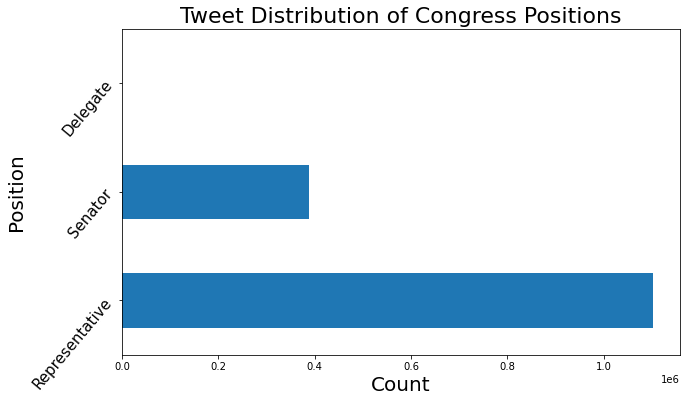

In [54]:
plt.figure(figsize=(10,6))

data['position'].value_counts().plot(kind = 'barh');

plt.title('Tweet Distribution of Congress Positions', fontsize=22)

plt.xlabel('Count', fontsize=20)
plt.yticks(fontsize= 15)
plt.ylabel('Position', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

In [55]:
data['party'].value_counts(normalize=True)

D    0.618280
R    0.375229
I    0.004185
L    0.002306
Name: party, dtype: float64

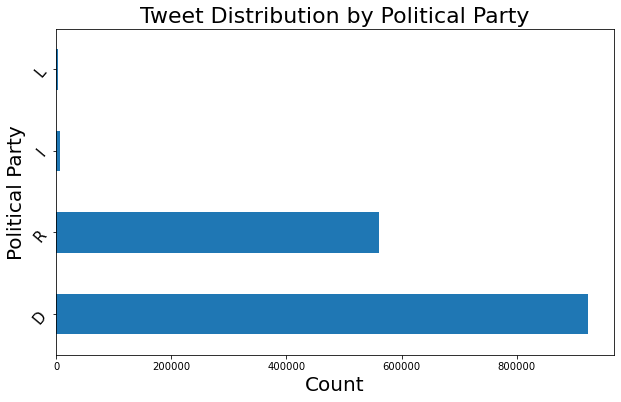

In [56]:
plt.figure(figsize=(10,6))

data['party'].value_counts().plot(kind = 'barh');

plt.title('Tweet Distribution by Political Party', fontsize=22)

plt.xlabel('Count', fontsize=20)
plt.yticks(fontsize= 15)
plt.ylabel('Political Party', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

In [57]:
data['congress'].value_counts(normalize=True)

116    0.75343
115    0.24657
Name: congress, dtype: float64

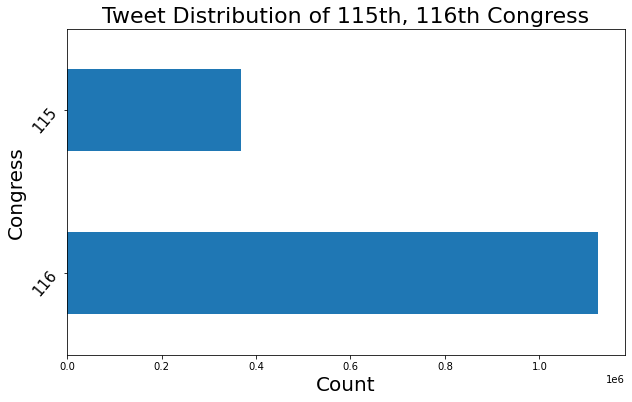

In [58]:
plt.figure(figsize=(10,6))

data['congress'].value_counts().plot(kind = 'barh');

plt.title('Tweet Distribution of 115th, 116th Congress', fontsize=22)

plt.xlabel('Count', fontsize=20)
plt.yticks(fontsize= 15)
plt.ylabel('Congress', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

In [59]:
data['state'].value_counts(normalize=True)[:10].sort_values(ascending=False)

CA    0.101915
TX    0.075951
FL    0.061843
NY    0.057464
IL    0.043591
VA    0.034570
NJ    0.033908
PA    0.033684
OH    0.030921
AZ    0.029939
Name: state, dtype: float64

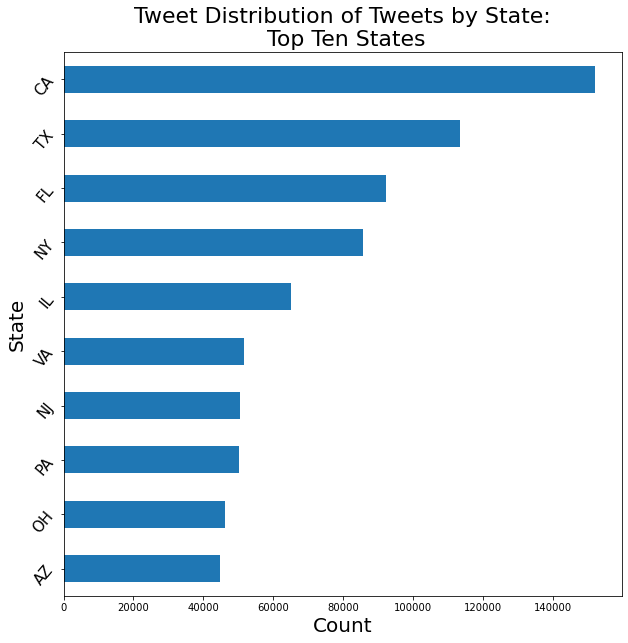

In [60]:
plt.figure(figsize=(10,10))

data['state'].value_counts()[:10].sort_values(ascending=True).plot(kind = 'barh')

plt.title('Tweet Distribution of Tweets by State:\n Top Ten States', fontsize=22)

plt.xlabel('Count', fontsize=20)
plt.yticks(fontsize= 15)
plt.ylabel('State', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

In [61]:
data['name'].value_counts(normalize=True)[:10].sort_values(ascending=False)

John Cornyn           0.011635
Andy Biggs            0.009966
Dwight Evans          0.008506
Donald Beyer Jr       0.008237
Wm. Lacy Clay Jr      0.006953
Carolyn Maloney       0.006845
Pramila Jayapal       0.006137
Christopher Murphy    0.005890
Ted Cruz              0.005807
Sheldon Whitehouse    0.005672
Name: name, dtype: float64

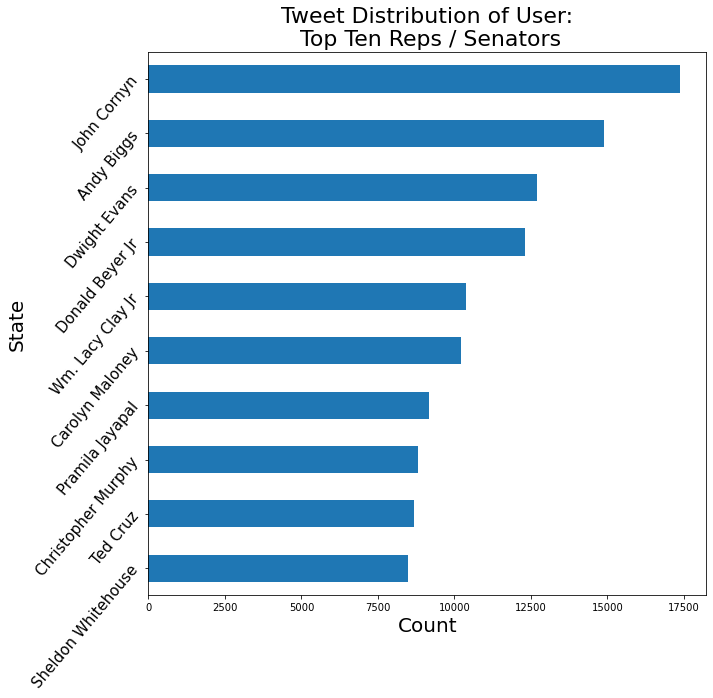

In [62]:
plt.figure(figsize=(10,10))

data['name'].value_counts()[:10].sort_values(ascending=True).plot(kind = 'barh')

plt.title('Tweet Distribution of User:\n Top Ten Reps / Senators', fontsize=22)

plt.xlabel('Count', fontsize=20)
plt.yticks(fontsize= 15)
plt.ylabel('State', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()